## Dependencies

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import glob 
import os 
import cv2
import math
import numpy as np
import pandas as pd
from keras import applications
from keras.models import Sequential, Model
from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from pathlib import Path


## Load Dataset

In [2]:
## Load data

csv_path = r'D:\PCOS_Challenge\Old folder\PCOSGen-train\class_label.xlsx'
# Original df
df = pd.read_excel(csv_path)

# Images and Labels
X = df.loc[:,'imagePath']
y = df.loc[:,'Healthy']

## Splitted dataset

In [3]:
Train_x = []
Train_y = []

for folder in ['healthy','unhealthy']:
    images = glob.glob(r'D:\PCOS_Challenge\New folder\New_split\train\%s\*.*'%folder)
    #print(images)
    #break

    for i in range(len(images)): 
        image = cv2.imread(images[i])
        #print(image.shape)
        #break
        try : 
            image = cv2.resize(image, (256,256))
            image = tf.keras.preprocessing.image.img_to_array(image)
            Train_x.append(image)
            Train_y.append(folder)
        except : 
            pass
    print(len(images),folder)

1264 healthy
1608 unhealthy


In [4]:
#Train_y

In [5]:
Valid_x = []
Valid_y = []

for folder in ['healthy','unhealthy']:
    images = glob.glob(r'D:\PCOS_Challenge\New folder\New_split\valid\%s\*.*'%folder)
    #print(images)
    #break

    for i in range(len(images)): 
        image = cv2.imread(images[i])
        #print(image.shape)
        #break
        try : 
            image = cv2.resize(image, (256,256))
            image = tf.keras.preprocessing.image.img_to_array(image)
            Valid_x.append(image)
            Valid_y.append(folder)
        except : 
            pass
    print(len(images),folder)

542 healthy
689 unhealthy


In [6]:
Train_x = np.array(Train_x)
Valid_x = np.array(Valid_x)

Train_y = np.array(Train_y)
Valid_y = np.array(Valid_y)

print(Train_x.shape)
print(Train_y.shape)
print(Valid_x.shape)
print(Valid_y.shape)

(2872, 256, 256, 3)
(2872,)
(1231, 256, 256, 3)
(1231,)


## Categorical to numerical conversion of label

In [7]:
dict_ = {'unhealthy':0,
       'healthy':1}
label_dict = {0: 'unhealthy', 1: 'healthy'}

Train_y = np.vectorize(dict_.get)(Train_y)
Valid_y = np.vectorize(dict_.get)(Valid_y)

In [8]:
#Train_y

In [9]:
Train_y.shape

(2872,)

In [10]:
Valid_y.shape

(1231,)

## Reshaping data

In [11]:
train_images_reshaped = Train_x.reshape((-1, 256, 256,3))
train_labels_reshaped = to_categorical(Train_y, num_classes=2)

valid_images_reshaped = Valid_x.reshape((-1, 256, 256,3))
valid_labels_reshaped = to_categorical(Valid_y, num_classes=2)

## CNN Model

In [12]:
# Convolution Neural Networks (CNN)
model = Sequential()

model.add(Conv2D(8, kernel_size=(3,3), padding='same', input_shape = (256, 256,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Conv2D(16, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       224       
                                                                 
 activation (Activation)     (None, 256, 256, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        1168      
                                                                 
 batch_normalization (Batch  (None, 85, 85, 16)        64        
 Normalization)                                                  
                                                                 
 activation_1 (Activation)   (None, 85, 85, 16)      

In [29]:
model.fit(train_images_reshaped, train_labels_reshaped, epochs=100, validation_data = (valid_images_reshaped, valid_labels_reshaped), shuffle=True)

Epoch 1/100


116/116 [==============================] - 15s 99ms/step - loss: 0.8652 - accuracy: 0.5424 - val_loss: 0.7909 - val_accuracy: 0.6049
Epoch 2/100
116/116 [==============================] - 8s 69ms/step - loss: 0.7533 - accuracy: 0.5922 - val_loss: 0.7487 - val_accuracy: 0.5829
Epoch 3/100
116/116 [==============================] - 8s 70ms/step - loss: 0.7155 - accuracy: 0.6177 - val_loss: 0.7384 - val_accuracy: 0.6049
Epoch 4/100
116/116 [==============================] - 8s 69ms/step - loss: 0.6972 - accuracy: 0.6269 - val_loss: 0.7287 - val_accuracy: 0.6268
Epoch 5/100
116/116 [==============================] - 8s 69ms/step - loss: 0.6833 - accuracy: 0.6366 - val_loss: 0.7169 - val_accuracy: 0.6317
Epoch 6/100
116/116 [==============================] - 8s 67ms/step - loss: 0.6682 - accuracy: 0.6477 - val_loss: 0.7037 - val_accuracy: 0.6366
Epoch 7/100
116/116 [==============================] - 8s 66ms/step - loss: 0.6564 - accuracy: 0.6561 - val_loss: 0.6913 - val_accura

In [13]:
#model.save_weights(r'D:\PCOS_Challenge\New folder\Saved Models\cnn_model1.h5')
model_path = r'D:\PCOS_Challenge\New folder\Saved Models\cnn_model1.h5'
model.load_weights(model_path)

In [14]:
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_path = r'D:\PCOS_Challenge\New folder\New_split\train'
train_generator = train_datagen.flow_from_directory(
        train_path,  
        target_size=(256, 256),  
        batch_size=batch_size,
        class_mode='categorical')


Found 2872 images belonging to 2 classes.


In [17]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000//batch_size,
        epochs=200)

Epoch 1/200


C:\Users\User\AppData\Local\Temp\ipykernel_36480\991844826.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


 70/125 [===============>..............] - ETA: 11s - loss: 2.1296 - accuracy: 0.1482

KeyboardInterrupt: 

In [123]:
#model.save_weights(r'D:\PCOS_Challenge\New folder\Saved Models\cnn_data_generator.h5')

In [16]:
batch_size = 1

test_path = r'D:\PCOS_Challenge\New folder\New_split\valid'
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(256, 256),
    batch_size=1, 
    shuffle=True)
y_pred = model.predict_generator(test_generator, 1//batch_size, workers=2)

Found 1231 images belonging to 2 classes.


C:\Users\User\AppData\Local\Temp\ipykernel_38216\1050087668.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator, 1//batch_size, workers=2)


In [17]:
test_generator.class_indices

{'healthy': 0, 'unhealthy': 1}

In [18]:
gen_label_dict = test_generator.class_indices
gen_label_dict

{'healthy': 0, 'unhealthy': 1}

In [19]:
label_dict

{0: 'unhealthy', 1: 'healthy'}

In [20]:
label_dict = {0: 'healthy', 1: 'unhealthy'}

In [21]:
model_path = r'D:\PCOS_Challenge\New folder\Saved Models\cnn_data_generator.h5'
model.load_weights(model_path)

1/1 [==============================] - 0s 134ms/step
[[0.98310906 0.01689101]]


Text(0.5, 1.0, 'healthy')

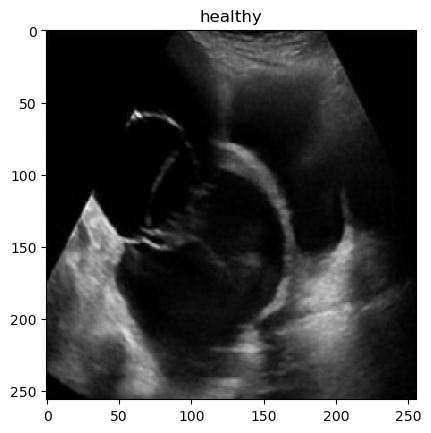

In [90]:
x_test, y_test = next(test_generator)
p = model.predict(x_test)
print(p)
p = p.argmax()
plt.imshow(x_test[0])
plt.title(label_dict[p])

In [95]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

cnn_preds = model.predict(test_generator)
cnn_pred_classes = np.argmax(cnn_preds, axis=1)

cnn_acc = accuracy_score(true_classes, cnn_pred_classes)
print("CNN Model Accuracy without Fine-Tuning: {:.2f}%".format(cnn_acc * 100))

1231/1231 [==============================] - 5s 4ms/step
CNN Model Accuracy without Fine-Tuning: 52.56%


## VGG16 Model

In [107]:

def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [108]:
input_shape = (256, 256, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=2
BATCH_SIZE = 16

n_steps = train_generator.samples // BATCH_SIZE
n_val_steps = test_generator.samples // BATCH_SIZE
n_epochs = 100

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)


In [91]:
!pip3 install livelossplot

In [109]:
from livelossplot.inputs.keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath=r'D:\PCOS_Challenge\New folder\Saved Models\tl_model_v1.weights.best_vgg16.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')


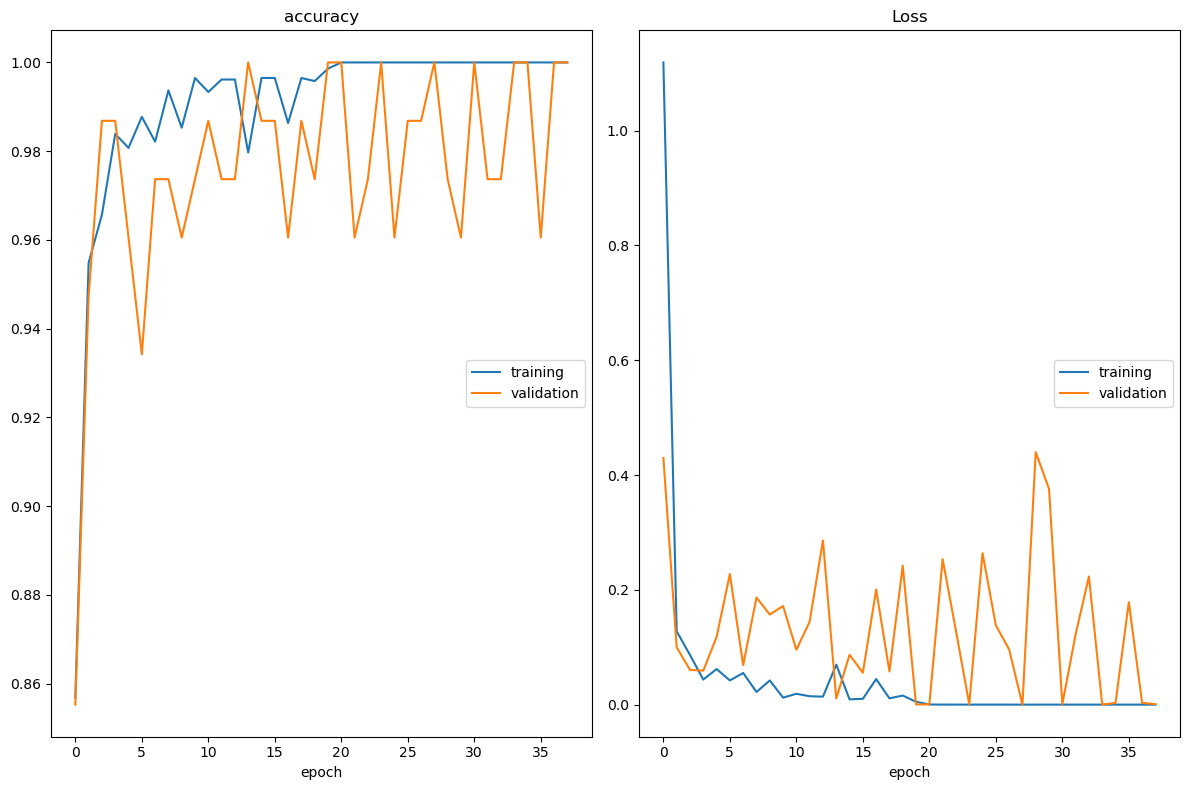

accuracy
	training         	 (min:    0.857, max:    1.000, cur:    1.000)
	validation       	 (min:    0.855, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    1.119, cur:    0.000)
	validation       	 (min:    0.000, max:    0.440, cur:    0.001)
179/179 [==============================] - 384s 2s/step - loss: 1.2113e-06 - accuracy: 1.0000 - val_loss: 8.2823e-04 - val_accuracy: 1.0000
CPU times: total: 1d 22h 15min 49s
Wall time: 3h 58min 50s


In [110]:
%%time 

vgg_history = vgg_model.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=test_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)


In [111]:
# Generate predictions
vgg_model.load_weights(r'D:\PCOS_Challenge\New folder\Saved Models\tl_model_v1.weights.best_vgg16.hdf5') # initialize the best trained weights

true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

vgg_preds = vgg_model.predict(test_generator)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)


1231/1231 [==============================] - 138s 112ms/step


In [112]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))


VGG16 Model Accuracy without Fine-Tuning: 50.37%


In [27]:
# Reset our image data generators
train_generator.reset()
test_generator.reset()


# Use a smaller learning rate
optim_2 = Adam(lr=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
vgg_model_ft = create_model(input_shape, n_classes, optim_2, fine_tune=2)


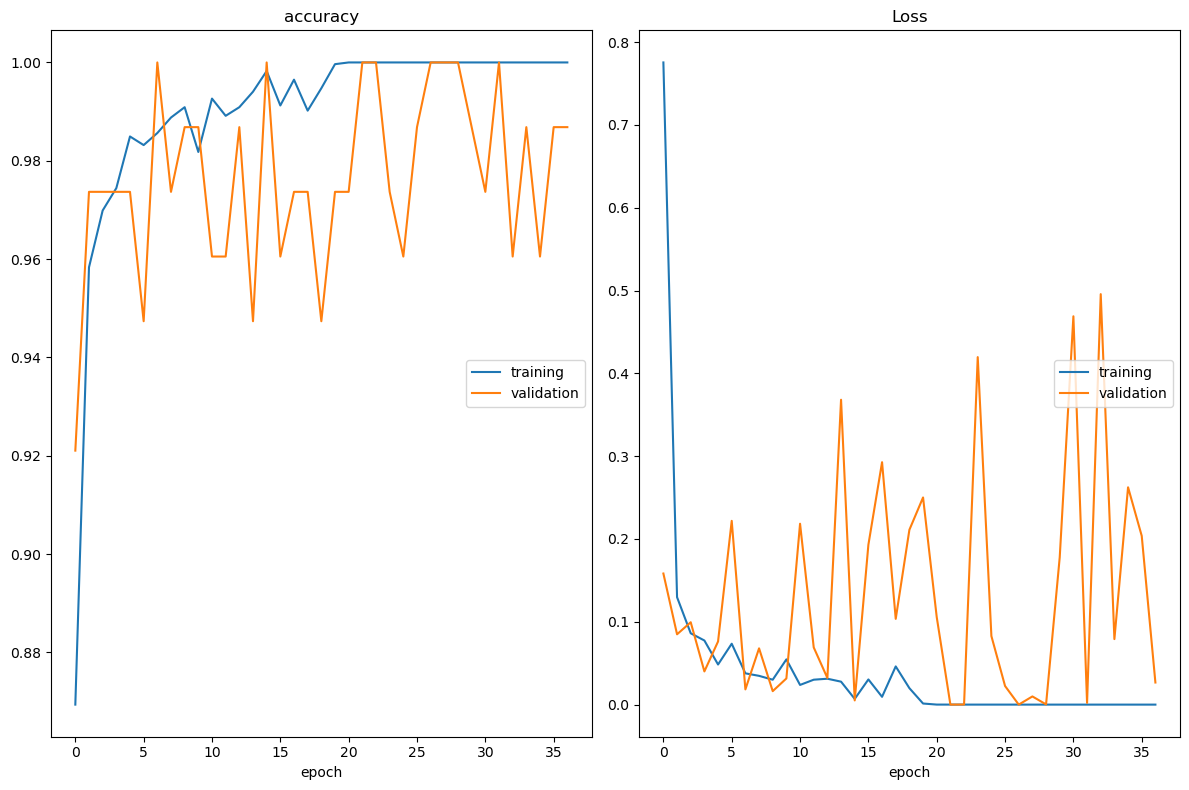

accuracy
	training         	 (min:    0.869, max:    1.000, cur:    1.000)
	validation       	 (min:    0.921, max:    1.000, cur:    0.987)
Loss
	training         	 (min:    0.000, max:    0.775, cur:    0.000)
	validation       	 (min:    0.000, max:    0.496, cur:    0.027)
179/179 [==============================] - 424s 2s/step - loss: 1.4275e-07 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 0.9868
CPU times: total: 2d 22min 33s
Wall time: 3h 51min 29s


In [136]:
%%time

plot_loss_2 = PlotLossesCallback()

# Retrain model with fine-tuning
vgg_ft_history = vgg_model_ft.fit(train_generator,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=test_generator,
                                  steps_per_epoch=n_steps, 
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
                                  verbose=1)


In [99]:
# Generate predictions
vgg_model_ft.load_weights(r'D:\PCOS_Challenge\New folder\Saved Models\tl_model_v1.weights.best.hdf5') # initialize the best trained weights

vgg_preds_ft = vgg_model_ft.predict(test_generator)
vgg_pred_classes_ft = np.argmax(vgg_preds_ft, axis=1)


1231/1231 [==============================] - 150s 122ms/step


In [100]:
vgg_acc_ft = accuracy_score(true_classes, vgg_pred_classes_ft)
print("VGG16 Model Accuracy with Fine-Tuning: {:.2f}%".format(vgg_acc_ft * 100))


VGG16 Model Accuracy with Fine-Tuning: 51.58%


## Comparing models

In [30]:
test_generator.class_indices.keys()

dict_keys(['healthy', 'unhealthy'])

In [31]:
true_classes

array([0, 0, 0, ..., 1, 1, 1])

In [32]:
class_subset = ['healthy', 'unhealthy']

In [33]:
Test_x = []
images_list = []

for folder in ['images']:
    images = glob.glob(r'D:\PCOS_Challenge\New folder\Test data\%s\*.*'%folder)
    #print(images)
    #break

    for i in range(len(images)): 
        image = cv2.imread(images[i])
        images_list.append(image)
        #print(image.shape)
        #break
        try : 
            image = cv2.resize(image, (256,256))
            #image = tf.keras.preprocessing.image.img_to_array(image)
            image = np.expand_dims(image, axis=0)
            Test_x.append(image)
            
        except : 
            pass
    print(len(images),folder)

1468 images


In [34]:
Test_x

[array([[[[2, 2, 2],
          [2, 2, 2],
          [4, 4, 4],
          ...,
          [1, 1, 1],
          [1, 1, 1],
          [0, 0, 0]],
 
         [[2, 2, 2],
          [2, 2, 2],
          [1, 1, 1],
          ...,
          [3, 3, 3],
          [2, 2, 2],
          [1, 1, 1]],
 
         [[3, 3, 3],
          [1, 1, 1],
          [0, 0, 0],
          ...,
          [6, 6, 6],
          [5, 5, 5],
          [2, 2, 2]],
 
         ...,
 
         [[0, 0, 0],
          [1, 1, 1],
          [1, 1, 1],
          ...,
          [3, 3, 3],
          [3, 3, 3],
          [3, 3, 3]],
 
         [[0, 0, 0],
          [1, 1, 1],
          [1, 1, 1],
          ...,
          [3, 3, 3],
          [3, 3, 3],
          [3, 3, 3]],
 
         [[0, 0, 0],
          [1, 1, 1],
          [1, 1, 1],
          ...,
          [3, 3, 3],
          [3, 3, 3],
          [3, 3, 3]]]], dtype=uint8),
 array([[[[  1,   1,   1],
          [  1,   1,   1],
          [  1,   1,   1],
          ...,
          

In [70]:
# Loading predictions from last article's model
testgen_generator = ImageDataGenerator(rescale=1/255.)

test_path = r'D:\PCOS_Challenge\New folder\Test data'

testgen = testgen_generator.flow_from_directory(test_path, target_size=(256, 256), class_mode=None, batch_size=1, shuffle=True)

model_path = r'D:\PCOS_Challenge\New folder\Saved Models\cnn_data_generator.h5'
model.load_weights(model_path)

x = next(testgen)
scratch_preds = model.predict(testgen)
print('Probability: ', scratch_preds)
scratch_pred_classes = np.argmax(scratch_preds, axis=1)

print("Predicted classes: ", scratch_pred_classes)
#scratch_acc = accuracy_score(true_classes, scratch_pred_classes)
#print("From Scratch Model Accuracy with Fine-Tuning: {:.2f}%".format(scratch_acc * 100))



Found 1468 images belonging to 1 classes.
1468/1468 [==============================] - 5s 3ms/step
Probability:  [[0.15112574 0.8488743 ]
 [0.5160854  0.48391464]
 [0.60103905 0.398961  ]
 ...
 [0.03073619 0.9692638 ]
 [0.08225999 0.91774   ]
 [0.02652875 0.9734712 ]]
Predicted classes:  [1 0 0 ... 1 1 1]


In [71]:
scratch_preds[0]

array([0.15112574, 0.8488743 ], dtype=float32)

In [86]:
test_generator.class_indices.keys()

dict_keys(['healthy', 'unhealthy'])

[0.15112574 0.8488743 ]
[0.5160854  0.48391464]
[0.60103905 0.398961  ]
[0.1063056 0.8936944]
[0.1592783 0.8407217]


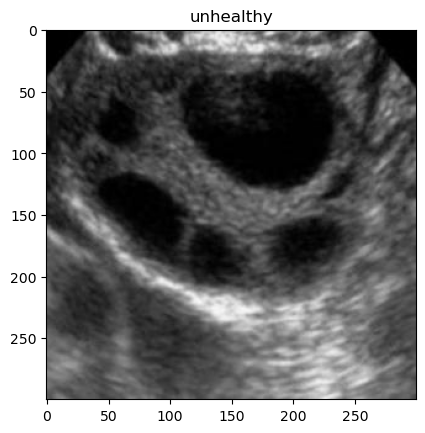

In [103]:
# Get the index of the image in the test dataset

folder = 'images'
images = glob.glob(r'D:\PCOS_Challenge\New folder\Test data\%s\*.*'%folder)

c=1
for i in range(len(images)): 
    #print(r'images\\'+images[i].split('\\')[-1])
    img_name = images[i].split('\\')[-1]
    image = cv2.imread(images[i])
    img_index = testgen.filenames.index(r'images\%s'%img_name)
    #scratch_preds = model.predict(testgen)
    print(scratch_preds[img_index])
    p = scratch_preds[img_index].argmax()
    plt.imshow(image)
    plt.title(label_dict[p])
    c=c+1
    if c == 6:
        break

In [104]:
vgg_preds = vgg_model.predict(testgen)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

1468/1468 [==============================] - 182s 124ms/step


[2.2833181e-05 9.9997711e-01]
[3.0424058e-14 1.0000000e+00]
[2.548178e-16 1.000000e+00]
[3.1414748e-07 9.9999964e-01]
[6.9671455e-07 9.9999928e-01]


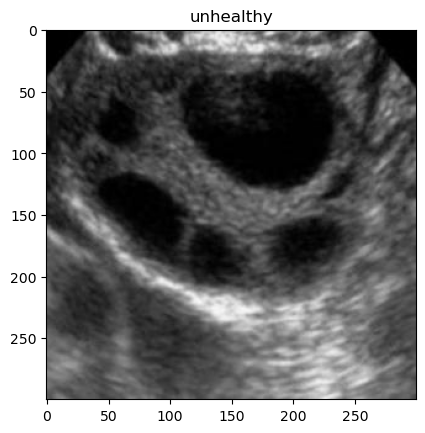

In [105]:
# Get the index of the image in the test dataset

folder = 'images'
images = glob.glob(r'D:\PCOS_Challenge\New folder\Test data\%s\*.*'%folder)

c=1
for i in range(len(images)): 
    #print(r'images\\'+images[i].split('\\')[-1])
    img_name = images[i].split('\\')[-1]
    image = cv2.imread(images[i])
    img_index = testgen.filenames.index(r'images\%s'%img_name)
    #scratch_preds = model.predict(testgen)
    print(vgg_preds[img_index])
    p = vgg_preds[img_index].argmax()
    plt.imshow(image)
    plt.title(label_dict[p])
    c=c+1
    if c == 6:
        break

1468/1468 [==============================] - 186s 126ms/step
[4.089396e-16 1.000000e+00]
[7.2873416e-20 1.0000000e+00]
[9.9997461e-01 2.5407286e-05]
[4.766581e-17 1.000000e+00]
[5.0874552e-15 1.0000000e+00]


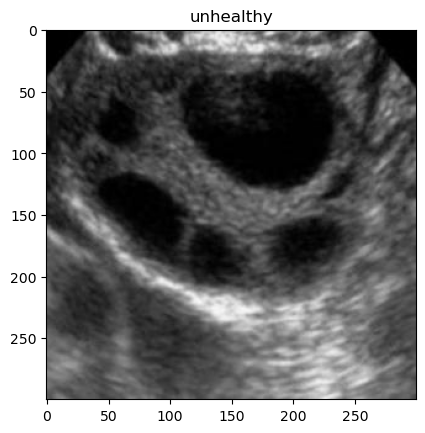

In [106]:
vgg_preds_ft = vgg_model_ft.predict(testgen)
vgg_pred_classes_ft = np.argmax(vgg_preds_ft, axis=1)

# Get the index of the image in the test dataset

folder = 'images'
images = glob.glob(r'D:\PCOS_Challenge\New folder\Test data\%s\*.*'%folder)

c=1
for i in range(len(images)): 
    #print(r'images\\'+images[i].split('\\')[-1])
    img_name = images[i].split('\\')[-1]
    image = cv2.imread(images[i])
    img_index = testgen.filenames.index(r'images\%s'%img_name)
    #scratch_preds = model.predict(testgen)
    print(vgg_preds_ft[img_index])
    p = vgg_preds_ft[img_index].argmax()
    plt.imshow(image)
    plt.title(label_dict[p])
    c=c+1
    if c == 6:
        break

[[235 307]
 [315 374]]
[[241 301]
 [309 380]]
[[242 300]
 [308 381]]


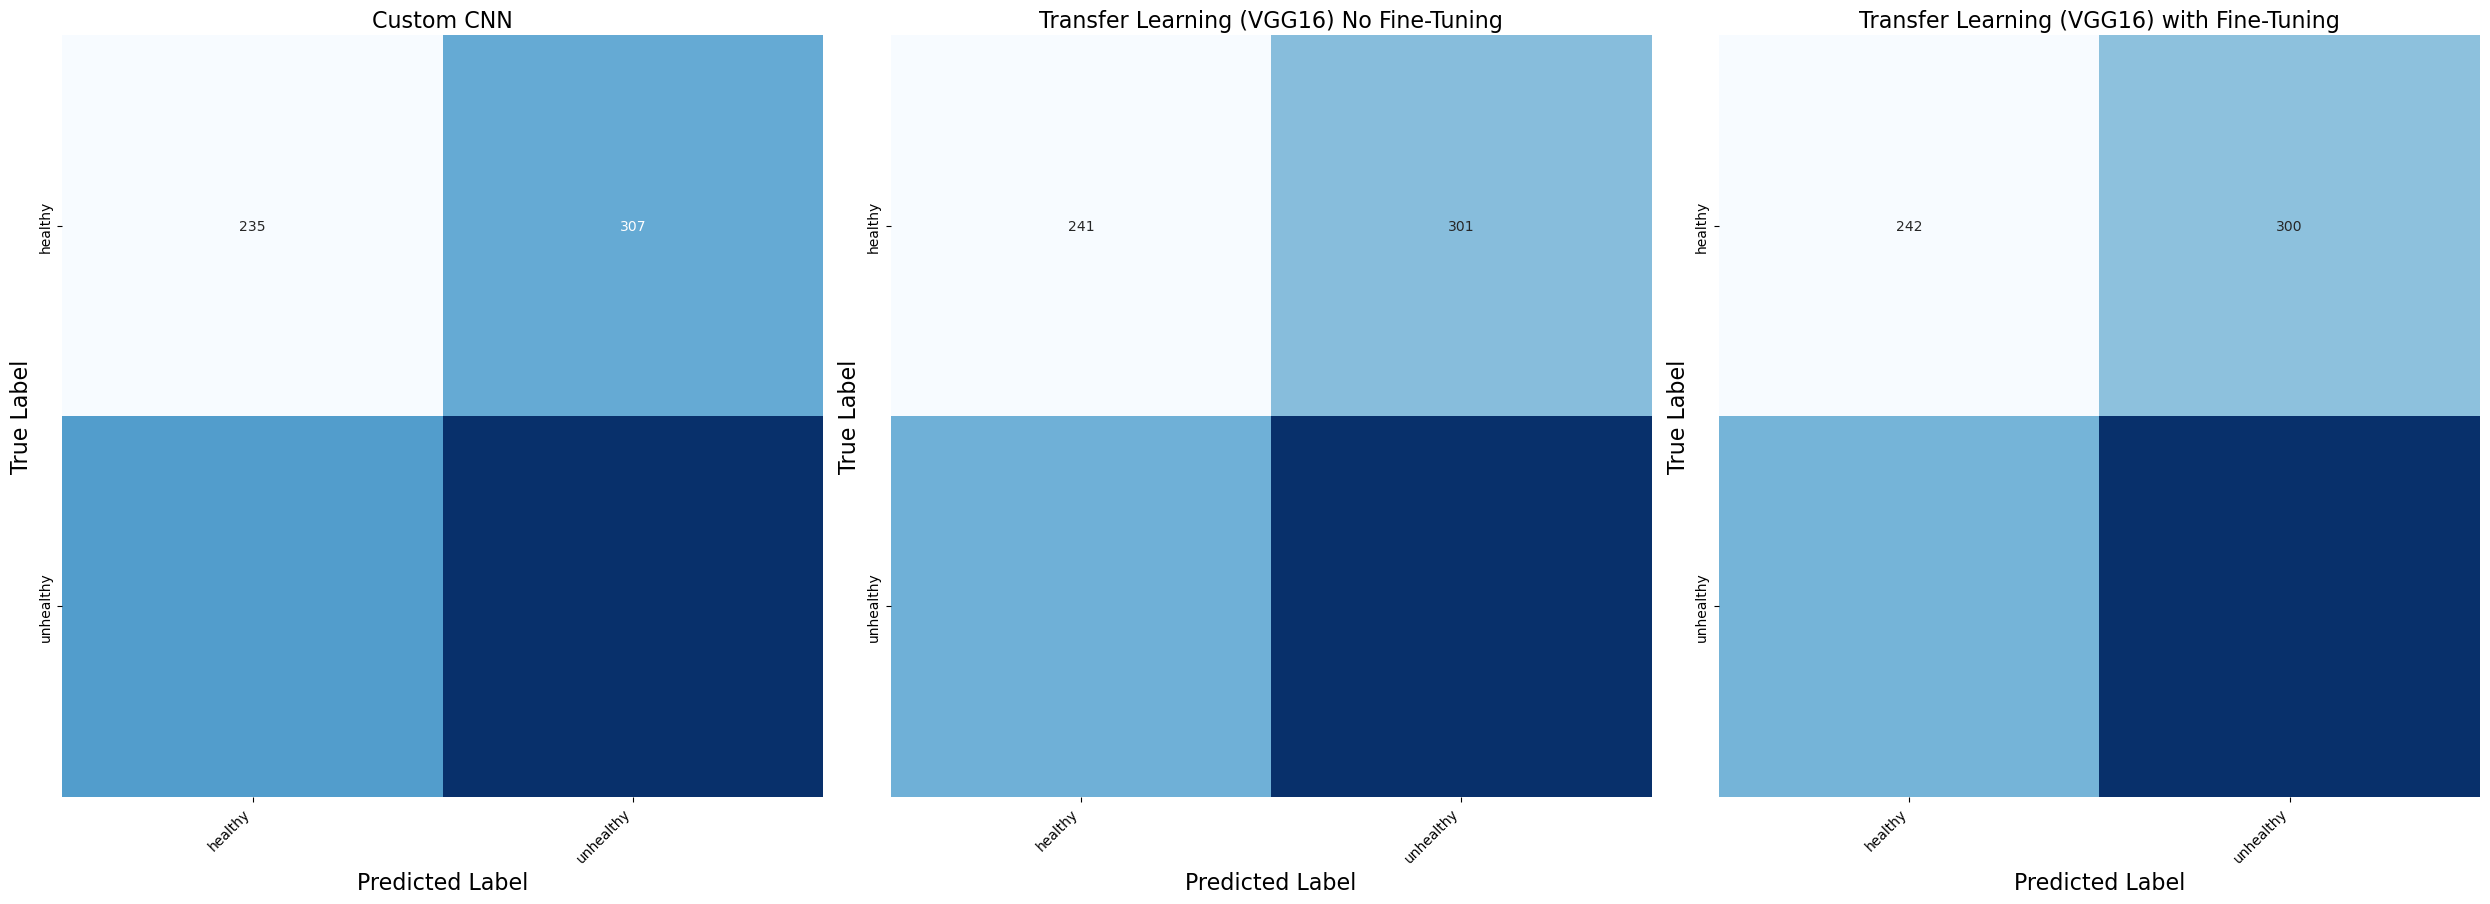

In [153]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the names of the ten classes
class_names = test_generator.class_indices.keys()

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=16)
    ax.set_xlabel('Predicted Label', fontsize=16)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 15))

plot_heatmap(true_classes, scratch_pred_classes, class_names, ax1, title="Custom CNN")    
plot_heatmap(true_classes, vgg_pred_classes, class_names, ax2, title="Transfer Learning (VGG16) No Fine-Tuning")    
plot_heatmap(true_classes, vgg_pred_classes_ft, class_names, ax3, title="Transfer Learning (VGG16) with Fine-Tuning")    

#fig.suptitle("Confusion Matrix Model Comparison", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=2.25)
#plt.savefig(r'D:\PCOS_Challenge\MIA_Project\images\comparison_cm.jpg')
plt.show()
